<a href="https://colab.research.google.com/github/rofiat13/thyroid-anomaly-detection/blob/main/thyroid_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Load Data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
thyroid_data = pd.read_csv('annthyroid_unsupervised_anomaly_detection.csv', delimiter= ";")

In [3]:
thyroid_data.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label,Unnamed: 22,Unnamed: 23
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,61.0,6.0,23.0,87.0,26.0,o,NaN,NaN
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,15.0,61.0,96.0,64.0,o,NaN,NaN
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.0,19.0,58.0,103.0,56.0,o,NaN,NaN
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,114.0,3.0,24.0,61.0,39.0,o,NaN,NaN
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.0,3.0,5.0,116.0,4.0,o,NaN,NaN


## Data Cleaning:

In [4]:
# Drop unnecessary columns
thyroid_data = thyroid_data .drop(["Unnamed: 22", "Unnamed: 23"], axis=1)
thyroid_data.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,61.0,6.0,23.0,87.0,26.0,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.0,15.0,61.0,96.0,64.0,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,29.0,19.0,58.0,103.0,56.0,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,114.0,3.0,24.0,61.0,39.0,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49.0,3.0,5.0,116.0,4.0,o


In [5]:
# Rename column
thyroid_data  = thyroid_data .rename({'Outlier_label ': 'Outlier_label'}, axis=1)

In [6]:
thyroid_data['Outlier_label'].value_counts()

Outlier_label
n    6666
o     250
Name: count, dtype: int64

In [7]:
# Map labels to 0 and 1
thyroid_data ['Outlier_label'] = thyroid_data ['Outlier_label'].map({'n': 0, 'o': 1})

In [8]:
# Explore label distribution
thyroid_data['Outlier_label'].value_counts()

Outlier_label
0    6666
1     250
Name: count, dtype: int64

In [9]:
thyroid_data['Outlier_label'].value_counts() / len(thyroid_data)

Outlier_label
0    0.963852
1    0.036148
Name: count, dtype: float64

In [10]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6916 non-null   float64
 1   Sex                        6916 non-null   float64
 2   on_thyroxine               6916 non-null   float64
 3   query_on_thyroxine         6916 non-null   float64
 4   on_antithyroid_medication  6916 non-null   float64
 5   sick                       6916 non-null   float64
 6   pregnant                   6916 non-null   float64
 7   thyroid_surgery            6916 non-null   float64
 8   I131_treatment             6916 non-null   float64
 9   query_hypothyroid          6916 non-null   float64
 10  query_hyperthyroid         6916 non-null   float64
 11  lithium                    6916 non-null   float64
 12  goitre                     6916 non-null   float64
 13  tumor                      6916 non-null   float

In [11]:
thyroid_data.describe()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label
count,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,...,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000,6916.000000
mean,0.595098,0.307548,0.134615,0.015616,0.013158,0.038317,0.011278,0.014315,0.016773,0.062753,...,0.008531,0.025448,0.000145,0.049740,1.603466,11.772446,94.253834,88.270139,95.257058,0.036148
std,6.189326,0.461512,0.341337,0.123993,0.113959,0.191974,0.105606,0.118793,0.128428,0.242536,...,0.091975,0.157494,0.012025,0.217422,14.047218,11.836250,50.555642,33.909845,55.031137,0.186672
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002500,0.050000,0.002400,0.000000
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000680,0.020100,77.000000,83.000000,81.000000,0.000000
50%,0.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001700,13.000000,101.000000,96.000000,105.000000,0.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002700,22.000000,123.000000,104.000000,125.000000,0.000000
max,515.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,494.000000,95.000000,395.000000,233.000000,642.000000,1.000000


<Axes: >

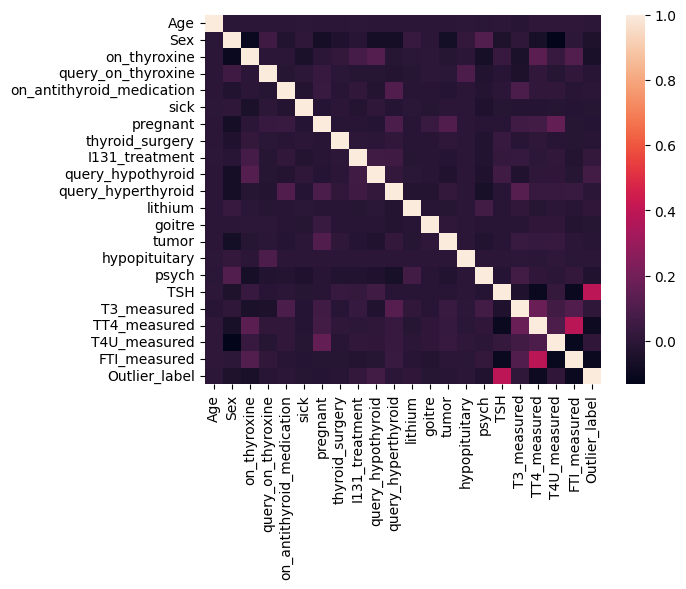

In [12]:
corr = thyroid_data .corr()
sns.heatmap(corr)

In [13]:
print(corr['Outlier_label'])

Age                         -0.000331
Sex                         -0.043454
on_thyroxine                -0.058223
query_on_thyroxine          -0.011896
on_antithyroid_medication   -0.001968
sick                        -0.014444
pregnant                    -0.020683
thyroid_surgery             -0.010295
I131_treatment               0.016931
query_hypothyroid            0.068073
query_hyperthyroid          -0.001070
lithium                      0.011939
goitre                      -0.017964
tumor                       -0.011619
hypopituitary               -0.002329
psych                       -0.033617
TSH                          0.392347
T3_measured                  0.005928
TT4_measured                -0.096712
T4U_measured                 0.012228
FTI_measured                -0.099859
Outlier_label                1.000000
Name: Outlier_label, dtype: float64


## Model Training and Evaluation:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay, auc, roc_curve, precision_recall_fscore_support, accuracy_score, classification_report

In [15]:
# Split data
x = thyroid_data.drop("Outlier_label", axis=1).values
y = thyroid_data["Outlier_label"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)


# np.set_printoptions(threshold=np.inf)



In [16]:
# Train XGBoost classifier
classifier = XGBClassifier()
params = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'eval_metric': ['logloss', 'auc', ]
    }

gridsearch = GridSearchCV(classifier, params, cv=3)
model = gridsearch.fit(X_train, y_train)

# Print best parameters and score
print(model.best_params_)
print(model.best_score_)

y_pred = model.predict(X_test)


{'eval_metric': 'logloss', 'learning_rate': 0.01, 'n_estimators': 200}
0.9768492377188029


In [17]:
# Evaluate model
print("Precision:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Precision: 0.9850602409638555
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5998
           1       0.90      0.66      0.76       227

    accuracy                           0.99      6225
   macro avg       0.95      0.83      0.88      6225
weighted avg       0.98      0.99      0.98      6225



## Model Evaluation and Visualization:

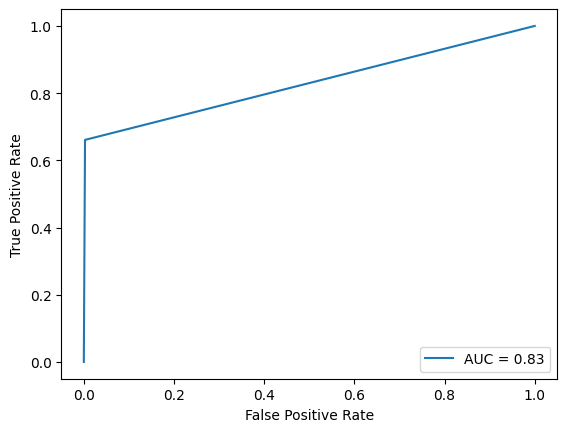

In [18]:
# Plot ROC curve
fpr1, tpr1, _ = roc_curve(y_test, y_pred)
roc1_auc = auc(fpr1, tpr1)
rcd1 = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc1_auc)
rcd1.plot()